In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.shape

(92016, 5)

In [4]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [14]:
# finding the number of days in the dataset
#total_days = len(df)/24
#total_days

3834.0

In [6]:
df["FullDate"]= pd.to_datetime(df["FullDate"])


In [7]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [86]:
daily_df = df.resample("D", on = "FullDate").sum()
daily_df.head()
df_daily=daily_df.reset_index()

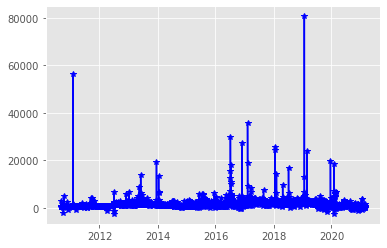

In [88]:
plt.style.use('ggplot')
plt.plot(df_daily.FullDate,df_daily.ElecPrice,marker = "*",color="b")

In [12]:
daily_df.shape

(3834, 4)

In [96]:
from statsmodels.tsa.stattools import adfuller
results1 = adfuller(daily_df["SysLoad"])
results1

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '10%': -2.567174716967499,
  '5%': -2.8623002987378547},
 79103.01504886392)

In [97]:
print(f"P_value(sysload):{results1[1]}")

P_value(sysload):0.004253725504574117


In [98]:
results2 = adfuller(daily_df["GasPrice"])
print(f"P_value (Gas_price):{results2[1]}")

P_value (Gas_price):0.04502721288462542


In [103]:
print("critical values:")
for key,value in results1[4].items():
      print(key, value)

critical values:
1% -3.432070672988693
5% -2.8623002987378547
10% -2.567174716967499


In [30]:
# Dividing the data to training and testing set with first 2757 being training and remaining X-2757 being test set.

X_train= daily_df.iloc[:2757,:-1]
y_train=daily_df.iloc[:2757,[-1]]
X_test = daily_df.iloc[2757:,:-1]
y_test = daily_df.iloc[2757:,[-1]]
print(y_train.head())
print(y_test.head())


            ElecPrice
FullDate             
2010-09-01   2751.700
2010-09-02    570.810
2010-09-03    504.975
2010-09-04    502.275
2010-09-05    500.555
            ElecPrice
FullDate             
2018-03-20    1833.00
2018-03-21    1730.49
2018-03-22    2260.55
2018-03-23    2138.76
2018-03-24    1721.70


In [54]:
# renaming the columns fulldate to df and elecprice to y
daily_df.reset_index(inplace = True)
daily_df = daily_df.rename(columns={"FullDate":"ds","ElecPrice":"y"})
daily_df

,ds,index,Tmax,SysLoad,GasPrice,y
0,2010-09-01,0,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,1,369.6,38898.99000,88.5600,570.810
2,2010-09-03,2,439.2,41665.76000,106.8000,504.975
3,2010-09-04,3,328.8,35638.08500,81.3600,502.275
4,2010-09-05,4,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...,...
3829,2021-02-24,3829,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,3830,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,3831,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,3832,564.0,4932.88015,130.0800,488.980


Univariate analysis Using FB Prophet

In [67]:
univ_df=daily_df[["ds","y"]]
univ_df["y"]
training_df = univ_df.iloc[:2757,:]
print(training_df.tail())
testing_df = univ_df.iloc[2757: , :]
print(testing_df.head())

             ds         y
2752 2018-03-15  2717.340
2753 2018-03-16  2277.335
2754 2018-03-17  1718.385
2755 2018-03-18  1088.015
2756 2018-03-19  1998.305
             ds        y
2757 2018-03-20  1833.00
2758 2018-03-21  1730.49
2759 2018-03-22  2260.55
2760 2018-03-23  2138.76
2761 2018-03-24  1721.70


In [68]:
from fbprophet import Prophet
model = Prophet()
model.fit(training_df)
future = model.make_future_dataframe(periods=(len(univ_df)-2757), freq= "D")
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1366.017257,3300.833284,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1370.653118,3481.346192,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1653.036256,3149.922907,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1971.512788,2735.799142,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2053.061704,2756.828557,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


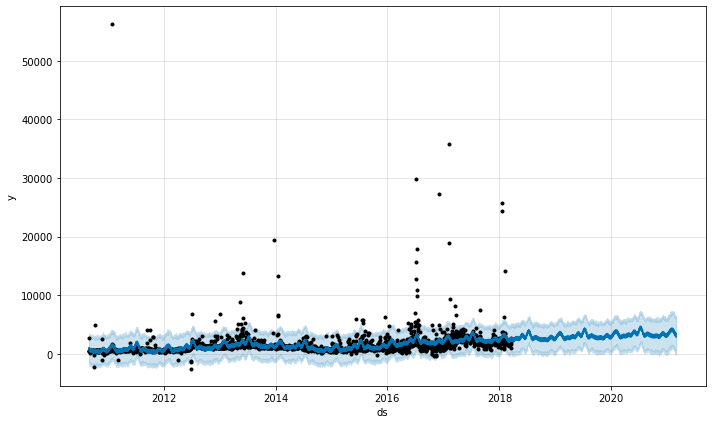

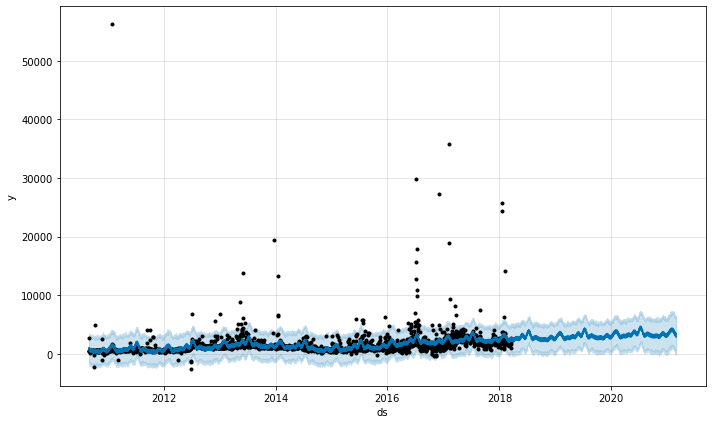

In [69]:
model.plot(forecast)

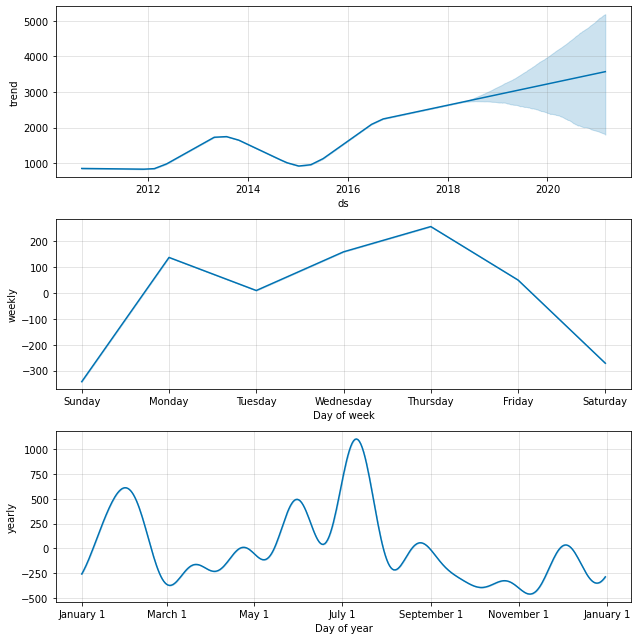

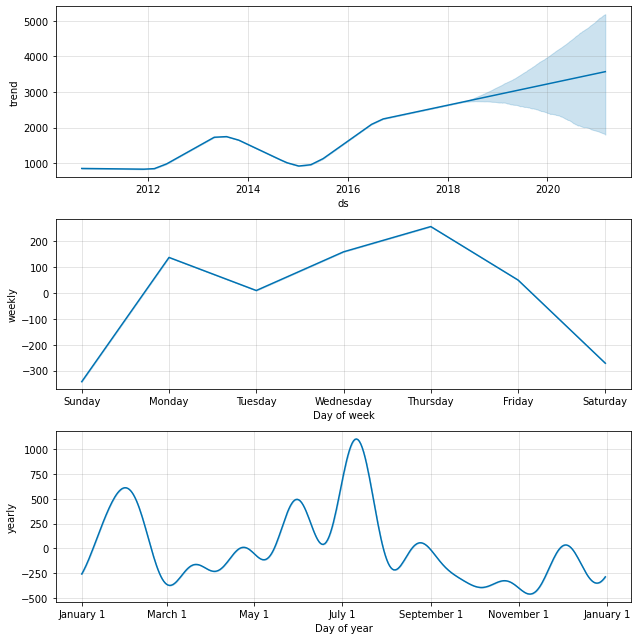

In [70]:
model.plot_components(forecast)

In [ ]:
def mape(pred):
   output =1/n*np.sum()

In [79]:
mult_df = daily_df.rename(columns={"SysLoad":"add1","Tmax":"add2","GasPrice":"add3" })
mult_df.drop("index",axis=1,inplace=True)
mult_df_train = mult_df.iloc[:2757,:]
mult_df_test = mult_df.iloc[2757:,:]
mult_df_train.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
import utils
mult_df_train, mult_df_test = utils.prepare_data(data_with_regressors, 2017)

In [80]:
m =Prophet()
m.add_regressor("add1")
m.add_regressor("add2")
m.add_regressor("add3")
m.fit(mult_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
mult_future = m.make_future_dataframe(periods=(len(univ_df)-2757), freq= "D")
mult_forecast =m.predict(mult_df_test.drop(columns="y"))
mult_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.816008,-226.702982,4355.130145,1866.816008,1866.816008,-854.927934,-854.927934,-854.927934,0.232346,...,-84.367504,-84.367504,-84.367504,-38.643882,-38.643882,-38.643882,0.0,0.0,0.0,1991.737865
1,2018-03-21,1867.512671,-229.341945,4212.071420,1867.512671,1867.512671,-1024.653099,-1024.653099,-1024.653099,0.229590,...,42.497418,42.497418,42.497418,-29.294910,-29.294910,-29.294910,0.0,0.0,0.0,1983.421127
2,2018-03-22,1868.209334,722.620218,5132.673906,1868.209334,1868.209334,-214.594937,-214.594937,-214.594937,0.216232,...,145.822951,145.822951,145.822951,-24.204766,-24.204766,-24.204766,0.0,0.0,0.0,2902.578272
3,2018-03-23,1868.905997,343.224481,4716.264493,1868.905997,1868.905997,-274.431734,-274.431734,-274.431734,0.208387,...,-44.133439,-44.133439,-44.133439,-23.232775,-23.232775,-23.232775,0.0,0.0,0.0,2586.725457
4,2018-03-24,1869.602660,-875.008753,3734.727825,1869.602660,1869.602660,-1074.613585,-1074.613585,-1074.613585,0.206479,...,-117.735502,-117.735502,-117.735502,-26.128782,-26.128782,-26.128782,0.0,0.0,0.0,1440.034805


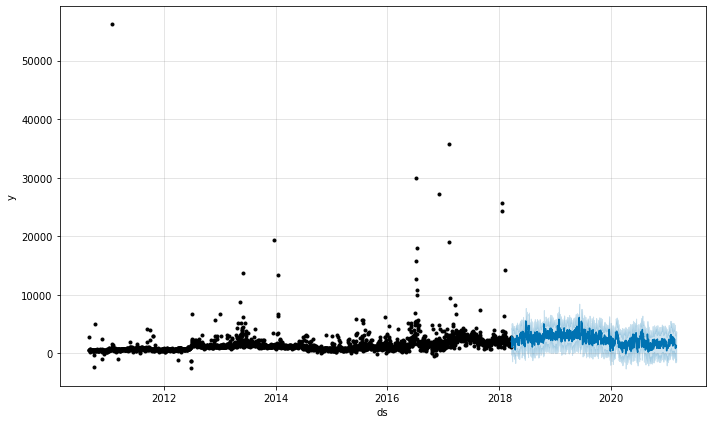

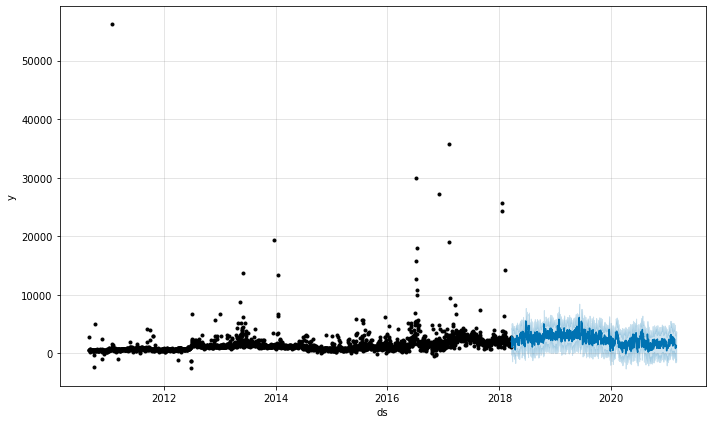

In [83]:
m.plot(mult_forecast)

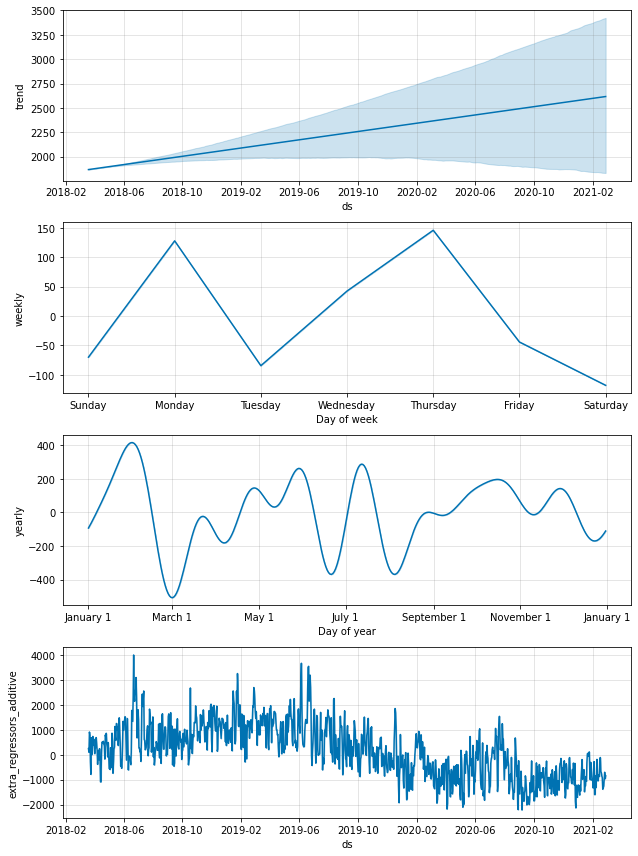

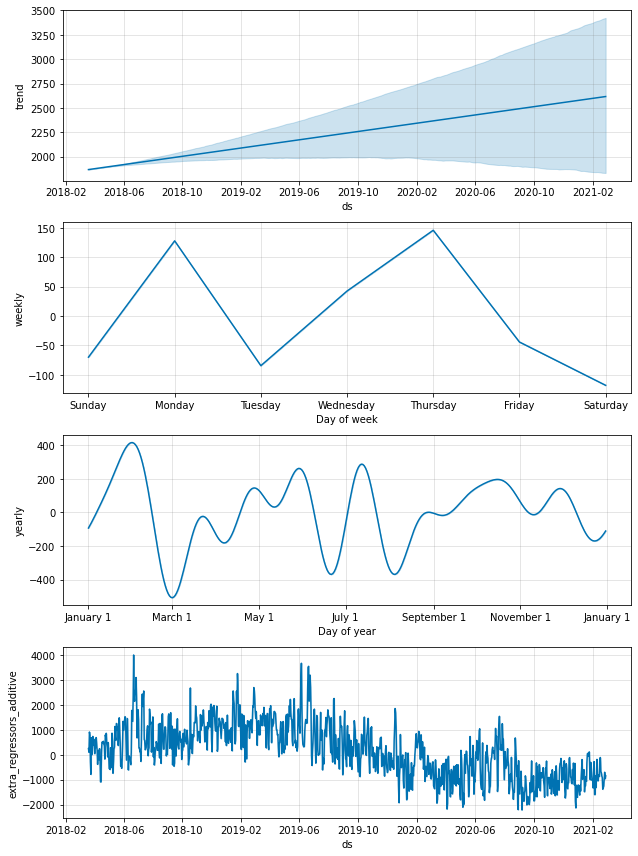

In [84]:
m.plot_components(mult_forecast)